# Classifier avec un arbre de décision

## Un premier problème

Le premier problème qui va nous intéresser est celui de décider s'il faut attendre pour une table dans un restaurant. Pour ce problème, la sortie est une valeur booléenne $y$, elle est vraie pour les exemples où l'on attend bien pour la table. L'entrée, $x$, est un vecteur de 10 attributs, qui ont chacun des valeurs discrètes :

1. `Alternative` : s'il y a un autre restaurant proche
2. `Bar` : si le restaurant a un zone agréable dans laquelle attendre
3. `Fri/Sat` : si on est vendredi ou samedi
4. `Hungry` : si on a faim en ce moment
5. `Patrons` : combien de personnes il y a dans le restaurant (les valeurs possibles sont _None_, _Some_ et _Full_)
6. `Price` : le prix d'un menu (_$_, _$$_, _$$$_)
7. `Raining` : s'il pleut dehors
8. `Reservation` : si on a fait une réservation
9. `Type` : le genre de restaurant (_French_, _Italian_, _Thai_ ou _Burger_)
10. `WaitEstimate` : le temps d'attente estimé (0-10, 10-30, 30-60 ou >60 minutes)

Un ensemble de 12 exemples tiré de l'expérience d'un chercheur en IA est montré ci-dessous :

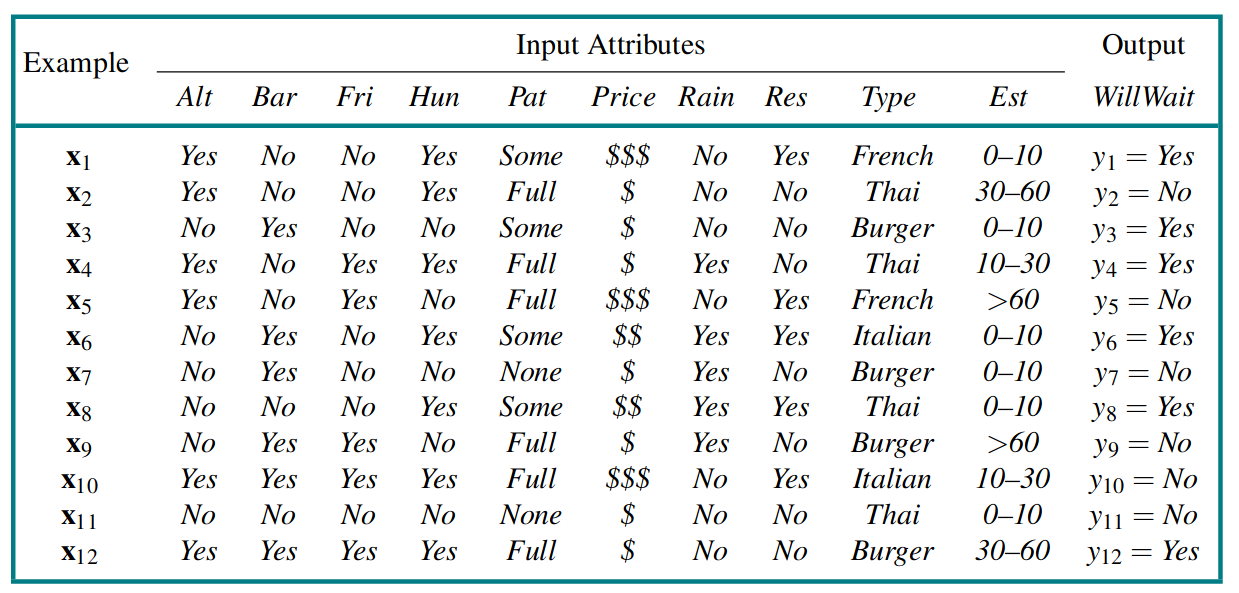

## Qu'est-ce qu'un arbre de décision ?

Un *arbre de décision* est une fonction qui associe un vecteur de valeurs en entrée à une unique valeur de sortie (une "décision").
Un arbre de décision prend une décision en performant une suite de tests, en commençant à la racine et en suivant les branches
appropriées jusqu'à qu'une feuille soit atteinte. Chaque noeud interne de l'arbre correspond à un test de valeurs pour un des
attributs de l'entrée, et les feuilles spécifient la valeur renvoyée par la fonction.

En général, les valeurs d'entrée et de sortie peuvent être discrètes ou continues, mais nous nous concentrerons dans un premier temps sur des valeurs d'entrée discrètes et sur des valeurs de sorties booléennes qui sont soit Vrai (un exemple *positif*) soit Faux (un exemple *négatif*). C'est un problème de *classification booléenne*.

## Comment entraîner un arbre de décision ?

Nous voulons trouver un arbre qui soit cohérent avec les exemples et qui soit aussi petit que possible. Malheureusement, il n'existe pas d'algorithme efficace qui permette de trouver à coup sûr l'arbre le plus petit possible. Mais avec quelques heuristiques simples, on peut en trouver un qui s'en approche. L'algorithme en pseudo-code ci-dessous adopte une stratégie gloutonne : toujours tester l'attribut le plus important en premier, puis résoudre récursivement les sous-problèmes qui sont définis par les résultats possibles du test. Par "attribut le plus important", on veut dire l'attribut qui a le plus d'impact sur la classification d'un exemple. De cette manière, on espère obtenir la classification correcte avec un petit nombre de tests.

La figure ci-dessous montre que l'attribut `Type` a un impact nul sur le problème de classification qui nous intéresse : peu importe la réponse, il y a autant d'exemples positifs que négatifs. Commencer par l'attribut `Patrons` a un bon impact, certaines réponses permettent même de répondre directement. Continuer avec `Hungry` est un second test assez bon.  

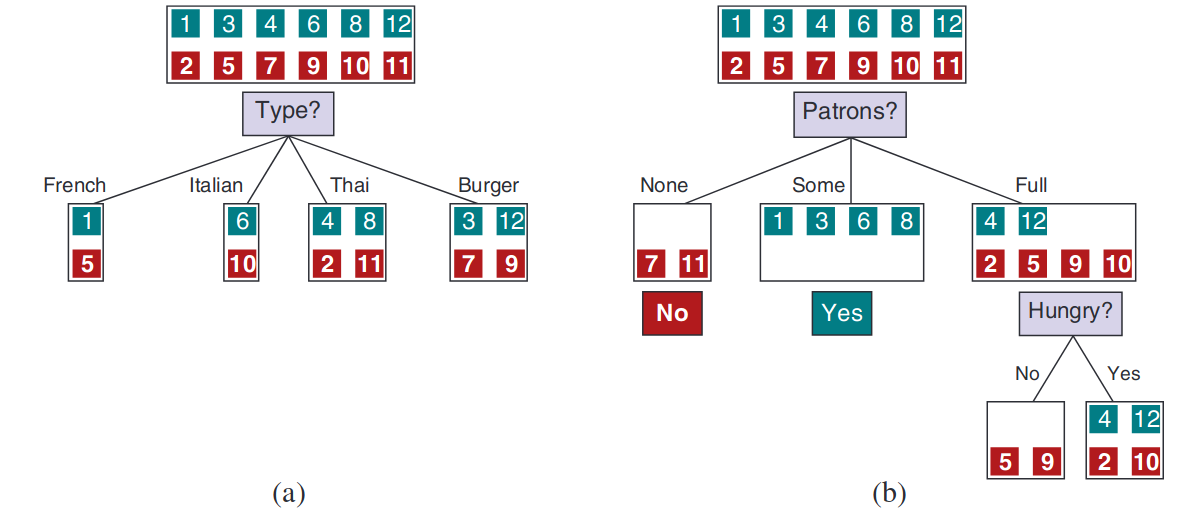


Voici en pseudo-code l'algorithme d'apprentissage d'un arbre de décision :

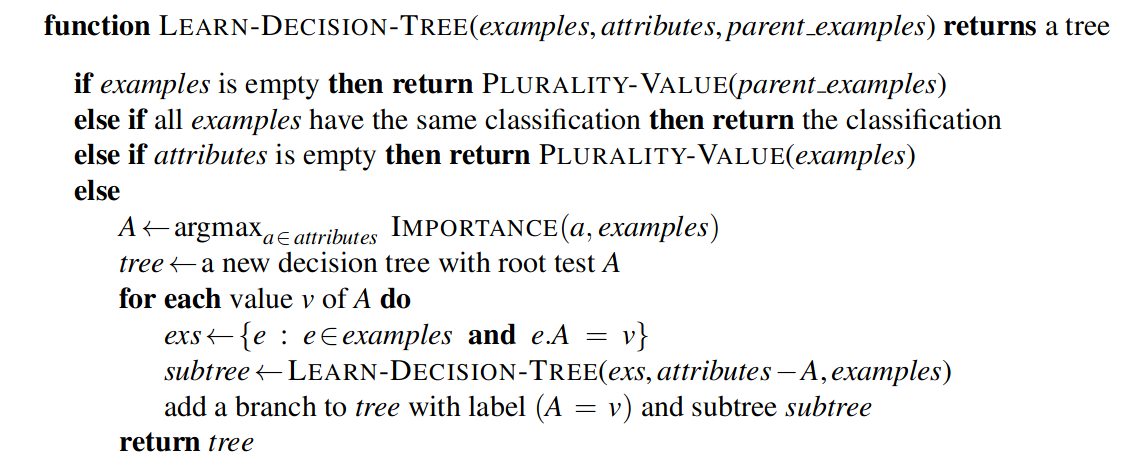

## Comment calculer l'`importance` d'un attribut ? 

L'importance d'un attribut est la quantité d'information qu'il nous donne sur la réponse finale. Nous allons utiliser l'*entropie* pour mesurer cette quantité d'information. L'entropie est une mesure de l'incertitude dans une variable aléatoire : plus on dispose d'information préalable sur le résultat de la variable, moins il y a d'entropie. Une variable aléatoire qui ne peut prendre qu'une seule valeur (par exemple, une pièce qui tombe toujours sur Face) n'a pas d'incertitude et a donc une entropie de 0. Une pièce équilibrée qui a autant de chance de tomber sur Face que sur Pile a "1 bit" d'entropie. Sans rentrer dans les détails, on définit $B(q)$ comme étant l'entropie d'un variable booléenne qui est vraie avec une probabilité $q$. $B$ est donnée par la formule :

$B(q) = -q\log_2{(q)} - (1-q)\log_2{(1-q)}$

_Essayez de prédire ce que valent $B(1)$, $B(0)$, $B(0.5)$ et $B(0.999)$. Calculez ces valeurs et comparez avec vos prédictions._

Revenons à notre exemple. Si un ensemble d'exemples contient $p$ exemples positifs et $n$ exemples négatifs, alors l'entropie de la sortie est :

$B(\frac{p}{n+p})$

L'ensemble des exemples donné plus haut a $p=n=6$, donc l'entropie correspondante est $B(0.5)$ soit exactement 1 bit. Le résultat d'un test sur un attribut $A$ va nous donner un peu d'information, ce qui va réduire l'entropie totale.

Un attribut $A$ avec $d$ valeurs distinctes divise l'ensemble d'entraînement $E$ en sous-ensembles $E_1, E_2, \dots, E_d$. Chaque sous-ensemble $E_k$ a $p_k$ exemples positifs et $n_k$ exemples négatifs, donc si on suit cette branche, il nous faut $B(\frac{pk}{pk+nk})$ bits d'informations supplémentaires pour répondre à la question. Un exemple choisi au hasard dans l'ensemble d'entraînement est dans $E_k$ avec la probabilité $\frac{p_k+n_k}{p+n}$, donc l'entropie restante attendue après un test sur $A$ est :

$\sum_{k=1}^d \frac{p_k + n_k}{p+n} B(\frac{p_k}{p_k+n_k})$

Donc le gain d'information moyen du test sur $A$ est :

$Gain(A) = B(\frac{p}{p+n}) - \sum_{k=1}^d \frac{p_k + n_k}{p+n} B(\frac{p_k}{p_k+n_k})$

Le gain est notre fonction `importance` pour déterminer quel attribut tester.

## À vous !

1. Implémentez l'algorithme `Learn-Decision-Tree` et entraînez un arbre à partir des données dans `train.csv`. Testez votre arbre à l'aide des données dans `test.csv`.



2. Modifiez l'algorithme pour que la fonction prenne en paramètre un entier `size` qui spécifie la taille maximale d'un arbre de décision.

3. Essayez de trouver la meilleur valeur pour l'hyper-paramètre `size` avec de la validation croisée.